<a href="https://colab.research.google.com/github/aditpurohit/Algo-Trading/blob/main/VWAP_and_Sentiment_Analysis_Based_Market_Making_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ndjnwejndjw


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.rcParams[ 'figure.figsize' ] = ( 16, 9 )
simtools = drive.CreateFile({'id':'17VE9unZ6Px0XyB13RyNKENCAhHLFSF8f'})
simtools.GetContentFile('simtools.py')
import simtools as st

In [ ]:
marketmaker2 = drive.CreateFile({'id':'1UrgGOobZkLxqWN2lTq4i8sqjooaVZ_9e'})
marketmaker2.GetContentFile('marketmaker2.py')

import marketmaker2 as mm

In [ ]:
link = 'https://drive.google.com/open?id=100tmpxlNEVVPO8m054TIa7_kP525fET5'
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('AMZN_TAQ.zip')
taq = pd.read_pickle('AMZN_TAQ.zip')

In [ ]:
test_day1 = '04/06/20'
test_day2 = '04/07/20'
day1 = taq[ test_day1 ]
day2 = taq[ test_day2 ]

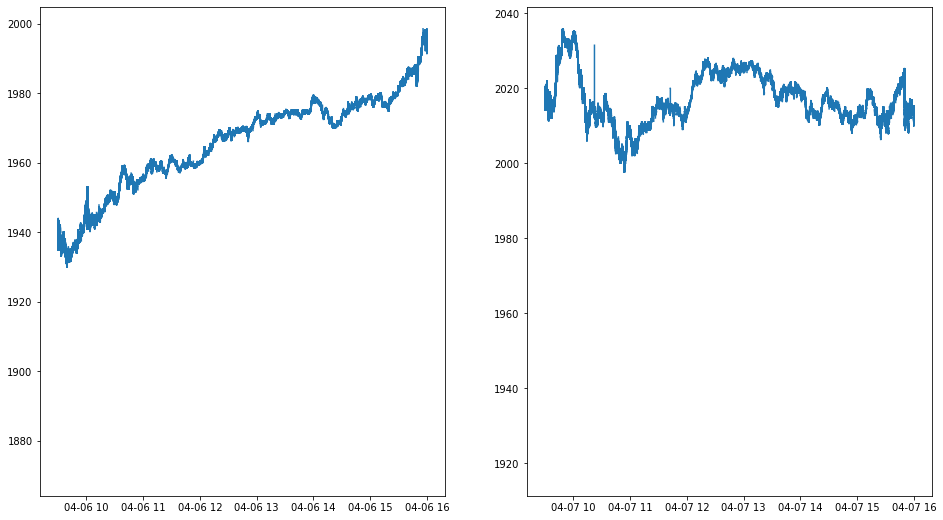

In [ ]:
fig, ( plt1, plt2 ) = plt.subplots( 1, 2 )
plt1.plot( day1.trade_px )
plt2.plot( day2.trade_px )
plt.show()

In [ ]:
nrc = drive.CreateFile({'id':'1VwAnJQmL1Z9DiRHvU_B17VIQaxPniNqJ'})
nrc = nrc.GetContentFile('NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt')

In [ ]:
consumer_key = 'aIZv99oxm0Uc82yIfiqok5smG'
consumer_secret = '70o3tNnhqfR3LwTIQrPXj9F2vHyXXtGcw2g2mfpDcqOWuWyG93'
access_token = '183296584-N09izAnEhH2eR7ksboD9d0Or1CjG79LJ0sny2kvo'
access_token_secret = 'YIxXLCGsNCLg3kHtWg1pVNkO2KJVXSqxAE8uCkfu6d83H'

In [ ]:
import tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
search_term = 'AAPL'
## fill in your search query and store your results in a variable
results = api.search(q = search_term, lang = "en", count = 100)

In [ ]:
print(type(results))
print(len(results))
print(type(results[0]))

<class 'tweepy.models.SearchResults'>
100
<class 'tweepy.models.Status'>


In [ ]:
apple_data = list()
for i in range(len(results)):
    apple_data.append(results[i]._json['text'])

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 5.0MB/s 


In [ ]:
sent_coef = list()


In [ ]:
#This is simpler and more efficient than nrc and doest require to store the files
import tweepy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores():
    print(datetime.datetime.now())
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    search_term = 'AMZN'

    results = api.search(q = search_term, lang = "en", count = 100)
    apple_data = list()
    for i in range(len(results)):
        apple_data.append(results[i]._json['text'])

    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(apple_data)

    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")

    print("Sentence Overall Rated As", end = " ")

    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")

    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
    else :
        print("Neutral")

    sent_coef.append(sentiment_dict)





In [ ]:

sent_coef

[]

In [ ]:
import time
endtime=time.time()+60.0 #1minute
while (time.time()<endtime):
    do something

SyntaxError: ignored

In [ ]:

search_term = 'AAPL'
for i in range(len(results)):
    fname = search_term+'.'+str(len(results)-i)
    with open('/Users/ruturajbhagat/Desktop/tweetdata/'+fname,'w') as f:
        f.write(results[i]._json['text']+'\n')

FileNotFoundError: ignored

In [ ]:
import threading, time
import datetime
def foo():
    sentiment_scores()
    print (time.ctime())

WAIT_TIME_SECONDS = 60

ticker = threading.Event()
while not ticker.wait(WAIT_TIME_SECONDS):
    foo()

2020-04-28 13:31:01.888795
Overall sentiment dictionary is :  {'neg': 0.048, 'neu': 0.792, 'pos': 0.161, 'compound': 0.9993}
sentence was rated as  4.8 % Negative
sentence was rated as  79.2 % Neutral
sentence was rated as  16.1 % Positive
Sentence Overall Rated As Positive
Tue Apr 28 13:31:02 2020
2020-04-28 13:32:02.433857
Overall sentiment dictionary is :  {'neg': 0.032, 'neu': 0.822, 'pos': 0.146, 'compound': 0.9988}
sentence was rated as  3.2 % Negative
sentence was rated as  82.19999999999999 % Neutral
sentence was rated as  14.6 % Positive
Sentence Overall Rated As Positive
Tue Apr 28 13:32:02 2020
2020-04-28 13:33:02.996288
Overall sentiment dictionary is :  {'neg': 0.041, 'neu': 0.827, 'pos': 0.132, 'compound': 0.9986}
sentence was rated as  4.1000000000000005 % Negative
sentence was rated as  82.69999999999999 % Neutral
sentence was rated as  13.200000000000001 % Positive
Sentence Overall Rated As Positive
Tue Apr 28 13:33:03 2020
2020-04-28 13:34:03.497162
Overall sentiment 

TweepError: ignored

In [ ]:
pos = list()
neg = list()
for i in range(len(e)):
    pos.append(e[i]['pos'])
    neg.append(e[i]['neg'])

In [ ]:
e = sent_coef.copy()
import numpy as np

In [ ]:
neg

[0.04,
 0.035,
 0.035,
 0.034,
 0.037,
 0.038,
 0.038,
 0.037,
 0.037,
 0.036,
 0.036,
 0.04,
 0.041,
 0.04,
 0.037,
 0.034,
 0.036,
 0.03,
 0.028,
 0.028,
 0.025,
 0.024,
 0.023,
 0.022,
 0.022,
 0.023,
 0.024,
 0.023,
 0.026,
 0.028,
 0.03,
 0.03,
 0.031,
 0.024,
 0.021,
 0.019,
 0.018,
 0.02,
 0.028,
 0.019,
 0.019,
 0.022,
 0.008,
 0.008,
 0.013,
 0.013,
 0.016,
 0.015,
 0.017,
 0.021,
 0.021,
 0.019,
 0.021,
 0.02,
 0.019,
 0.022,
 0.022,
 0.022,
 0.022,
 0.021,
 0.022,
 0.024,
 0.024,
 0.022,
 0.022,
 0.023,
 0.029,
 0.029,
 0.027,
 0.028,
 0.031,
 0.029,
 0.034,
 0.034,
 0.032,
 0.032,
 0.035,
 0.036,
 0.036,
 0.038,
 0.038,
 0.034,
 0.035,
 0.035,
 0.035,
 0.037,
 0.035,
 0.033,
 0.034,
 0.035,
 0.04,
 0.04,
 0.047,
 0.041,
 0.038,
 0.042,
 0.044,
 0.045,
 0.059,
 0.059,
 0.059,
 0.053,
 0.058,
 0.056,
 0.058,
 0.05,
 0.049,
 0.047,
 0.05,
 0.05,
 0.048,
 0.049,
 0.051,
 0.048,
 0.049,
 0.048,
 0.049,
 0.049,
 0.048,
 0.038,
 0.039,
 0.04,
 0.038,
 0.038,
 0.039,
 0.039,
 0.038

In [ ]:
#e = np.array(e)
e.extend([{'compound': 0.9947, 'neg': 0.072, 'neu': 0.789, 'pos': 0.139},
 {'compound': 0.9947, 'neg': 0.074, 'neu': 0.783, 'pos': 0.143},
 {'compound': 0.9947, 'neg': 0.072, 'neu': 0.787, 'pos': 0.14},
 {'compound': 0.9945, 'neg': 0.069, 'neu': 0.797, 'pos': 0.134},
 {'compound': 0.9915, 'neg': 0.068, 'neu': 0.808, 'pos': 0.124},
 {'compound': 0.9908, 'neg': 0.065, 'neu': 0.814, 'pos': 0.121},
 {'compound': 0.991, 'neg': 0.068, 'neu': 0.803, 'pos': 0.128},
 {'compound': 0.9899, 'neg': 0.069, 'neu': 0.808, 'pos': 0.123},
 {'compound': 0.9897, 'neg': 0.069, 'neu': 0.809, 'pos': 0.122},
 {'compound': 0.9938, 'neg': 0.059, 'neu': 0.816, 'pos': 0.124},
 {'compound': 0.9939, 'neg': 0.058, 'neu': 0.819, 'pos': 0.123},
 {'compound': 0.9911, 'neg': 0.061, 'neu': 0.826, 'pos': 0.113},
 {'compound': 0.9903, 'neg': 0.063, 'neu': 0.823, 'pos': 0.114},
 {'compound': 0.9846, 'neg': 0.066, 'neu': 0.822, 'pos': 0.112},
 {'compound': 0.984, 'neg': 0.069, 'neu': 0.818, 'pos': 0.113},
 {'compound': 0.9863, 'neg': 0.065, 'neu': 0.821, 'pos': 0.114},
 {'compound': 0.9919, 'neg': 0.051, 'neu': 0.838, 'pos': 0.111},
 {'compound': 0.9919, 'neg': 0.051, 'neu': 0.838, 'pos': 0.111},
 {'compound': 0.9916, 'neg': 0.054, 'neu': 0.832, 'pos': 0.114},
 {'compound': 0.9903, 'neg': 0.052, 'neu': 0.842, 'pos': 0.106},
 {'compound': 0.9903, 'neg': 0.057, 'neu': 0.827, 'pos': 0.116},
 {'compound': 0.9879, 'neg': 0.054, 'neu': 0.838, 'pos': 0.107},
 {'compound': 0.9866, 'neg': 0.056, 'neu': 0.838, 'pos': 0.106},
 {'compound': 0.9859, 'neg': 0.057, 'neu': 0.835, 'pos': 0.108},
 {'compound': 0.9905, 'neg': 0.051, 'neu': 0.837, 'pos': 0.112},
 {'compound': 0.9975, 'neg': 0.082, 'neu': 0.756, 'pos': 0.162},
 {'compound': 0.9965, 'neg': 0.089, 'neu': 0.752, 'pos': 0.158},
 {'compound': 0.9964, 'neg': 0.088, 'neu': 0.753, 'pos': 0.159},
 {'compound': 0.9964, 'neg': 0.09, 'neu': 0.749, 'pos': 0.162},
 {'compound': 0.9968, 'neg': 0.086, 'neu': 0.752, 'pos': 0.161},
 {'compound': 0.9973, 'neg': 0.078, 'neu': 0.761, 'pos': 0.16},
 {'compound': 0.9979, 'neg': 0.071, 'neu': 0.763, 'pos': 0.166},
 {'compound': 0.9979, 'neg': 0.07, 'neu': 0.765, 'pos': 0.165},
 {'compound': 0.9979, 'neg': 0.072, 'neu': 0.761, 'pos': 0.168},
 {'compound': 0.9961, 'neg': 0.078, 'neu': 0.767, 'pos': 0.155},
 {'compound': 0.9961, 'neg': 0.077, 'neu': 0.771, 'pos': 0.152},
 {'compound': 0.9969, 'neg': 0.063, 'neu': 0.79, 'pos': 0.148},
 {'compound': 0.9967, 'neg': 0.067, 'neu': 0.773, 'pos': 0.16},
 {'compound': 0.9967, 'neg': 0.068, 'neu': 0.77, 'pos': 0.162},
 {'compound': 0.9946, 'neg': 0.071, 'neu': 0.782, 'pos': 0.148},
 {'compound': 0.9928, 'neg': 0.07, 'neu': 0.788, 'pos': 0.142},
 {'compound': 0.9931, 'neg': 0.067, 'neu': 0.794, 'pos': 0.139},
 {'compound': 0.9931, 'neg': 0.066, 'neu': 0.796, 'pos': 0.138},
 {'compound': 0.9931, 'neg': 0.065, 'neu': 0.801, 'pos': 0.134}])

In [ ]:
from nltk.corpus import PlaintextCorpusReader
apple_data = PlaintextCorpusReader('/Users/ruturajbhagat/Desktop/tweetdata','AAPL.*')

In [ ]:
def get_nrc_data():
    # nrc = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict


def emotion_analyzer(text,emotion_dict=get_nrc_data()):
    #Set up the result dictionary
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0

    #Analyze the text and normalize by total number of words
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

def comparative_emotion_analyzer(text_tuples,object_name="Restaurant",print_output=False):
    if print_output:
        print("%-20s %1s\t%1s %1s %1s %1s   %1s %1s %1s %1s"%(object_name,
                                                              "fear","trust","negative","positive",
                                                              "joy","disgust","anticip", "sadness",
                                                              "surprise"))
    import pandas as pd
    df = pd.DataFrame(columns=[object_name,'Fear','Trust','Negative',
                           'Positive','Joy','Disgust','Anticipation',
                           'Sadness','Surprise'],)
    df.set_index(object_name,inplace=True)

    output = df
    for text_tuple in text_tuples:
        text = text_tuple[1]
        result = emotion_analyzer(text)
        if print_output:
            print("%-20s %1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
                text_tuple[1][0:20],result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise']))
        df.loc[text_tuple[0]] = [result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise']]
    return output
#And test it

In [ ]:
comparative_emotion_analyzer([['apple',apple_data.raw()]],object_name='Apple Tweets',print_output=False)

In [ ]:
[{'compound': 0.9949, 'neg': 0.04, 'neu': 0.778, 'pos': 0.182},
 {'compound': 0.9953, 'neg': 0.035, 'neu': 0.8, 'pos': 0.165},
 {'compound': 0.9956, 'neg': 0.035, 'neu': 0.797, 'pos': 0.168},
 {'compound': 0.9959, 'neg': 0.034, 'neu': 0.796, 'pos': 0.169},
 {'compound': 0.996, 'neg': 0.037, 'neu': 0.79, 'pos': 0.172},
 {'compound': 0.9925, 'neg': 0.038, 'neu': 0.819, 'pos': 0.143},
 {'compound': 0.9925, 'neg': 0.038, 'neu': 0.819, 'pos': 0.143},
 {'compound': 0.9925, 'neg': 0.037, 'neu': 0.824, 'pos': 0.139},
 {'compound': 0.9933, 'neg': 0.037, 'neu': 0.821, 'pos': 0.143},
 {'compound': 0.9933, 'neg': 0.036, 'neu': 0.824, 'pos': 0.14},
 {'compound': 0.994, 'neg': 0.036, 'neu': 0.818, 'pos': 0.145},
 {'compound': 0.994, 'neg': 0.04, 'neu': 0.802, 'pos': 0.158},
 {'compound': 0.9902, 'neg': 0.041, 'neu': 0.823, 'pos': 0.136},
 {'compound': 0.9913, 'neg': 0.04, 'neu': 0.822, 'pos': 0.138},
 {'compound': 0.9932, 'neg': 0.037, 'neu': 0.821, 'pos': 0.141},
 {'compound': 0.9924, 'neg': 0.034, 'neu': 0.828, 'pos': 0.137},
 {'compound': 0.9927, 'neg': 0.036, 'neu': 0.831, 'pos': 0.133},
 {'compound': 0.9923, 'neg': 0.03, 'neu': 0.855, 'pos': 0.115},
 {'compound': 0.9923, 'neg': 0.028, 'neu': 0.848, 'pos': 0.124},
 {'compound': 0.9923, 'neg': 0.028, 'neu': 0.852, 'pos': 0.121},
 {'compound': 0.9918, 'neg': 0.025, 'neu': 0.859, 'pos': 0.116},
 {'compound': 0.9918, 'neg': 0.024, 'neu': 0.863, 'pos': 0.113},
 {'compound': 0.9925, 'neg': 0.023, 'neu': 0.866, 'pos': 0.111},
 {'compound': 0.9935, 'neg': 0.022, 'neu': 0.867, 'pos': 0.111},
 {'compound': 0.9923, 'neg': 0.022, 'neu': 0.872, 'pos': 0.106},
 {'compound': 0.9931, 'neg': 0.023, 'neu': 0.863, 'pos': 0.114},
 {'compound': 0.9894, 'neg': 0.024, 'neu': 0.874, 'pos': 0.102},
 {'compound': 0.9918, 'neg': 0.023, 'neu': 0.87, 'pos': 0.107},
 {'compound': 0.9921, 'neg': 0.026, 'neu': 0.865, 'pos': 0.109},
 {'compound': 0.9946, 'neg': 0.028, 'neu': 0.852, 'pos': 0.12},
 {'compound': 0.9946, 'neg': 0.03, 'neu': 0.842, 'pos': 0.128},
 {'compound': 0.9946, 'neg': 0.03, 'neu': 0.842, 'pos': 0.128},
 {'compound': 0.9947, 'neg': 0.031, 'neu': 0.832, 'pos': 0.136},
 {'compound': 0.9929, 'neg': 0.024, 'neu': 0.854, 'pos': 0.122},
 {'compound': 0.9929, 'neg': 0.021, 'neu': 0.871, 'pos': 0.108},
 {'compound': 0.9944, 'neg': 0.019, 'neu': 0.863, 'pos': 0.118},
 {'compound': 0.9944, 'neg': 0.018, 'neu': 0.867, 'pos': 0.115},
 {'compound': 0.9944, 'neg': 0.02, 'neu': 0.853, 'pos': 0.127},
 {'compound': 0.9956, 'neg': 0.028, 'neu': 0.83, 'pos': 0.143},
 {'compound': 0.9949, 'neg': 0.019, 'neu': 0.844, 'pos': 0.138},
 {'compound': 0.9949, 'neg': 0.019, 'neu': 0.844, 'pos': 0.138},
 {'compound': 0.9945, 'neg': 0.022, 'neu': 0.847, 'pos': 0.131},
 {'compound': 0.9959, 'neg': 0.008, 'neu': 0.865, 'pos': 0.127},
 {'compound': 0.9959, 'neg': 0.008, 'neu': 0.869, 'pos': 0.123},
 {'compound': 0.9957, 'neg': 0.013, 'neu': 0.877, 'pos': 0.11},
 {'compound': 0.9957, 'neg': 0.013, 'neu': 0.872, 'pos': 0.115},
 {'compound': 0.9956, 'neg': 0.016, 'neu': 0.862, 'pos': 0.121},
 {'compound': 0.9956, 'neg': 0.015, 'neu': 0.87, 'pos': 0.114},
 {'compound': 0.9956, 'neg': 0.017, 'neu': 0.856, 'pos': 0.127},
 {'compound': 0.995, 'neg': 0.021, 'neu': 0.854, 'pos': 0.125},
 {'compound': 0.995, 'neg': 0.021, 'neu': 0.854, 'pos': 0.125},
 {'compound': 0.9963, 'neg': 0.019, 'neu': 0.851, 'pos': 0.13},
 {'compound': 0.9962, 'neg': 0.021, 'neu': 0.85, 'pos': 0.129},
 {'compound': 0.996, 'neg': 0.02, 'neu': 0.845, 'pos': 0.134},
 {'compound': 0.9962, 'neg': 0.019, 'neu': 0.866, 'pos': 0.115},
 {'compound': 0.996, 'neg': 0.022, 'neu': 0.847, 'pos': 0.131},
 {'compound': 0.996, 'neg': 0.022, 'neu': 0.847, 'pos': 0.131},
 {'compound': 0.9959, 'neg': 0.022, 'neu': 0.848, 'pos': 0.13},
 {'compound': 0.9959, 'neg': 0.022, 'neu': 0.847, 'pos': 0.131},
 {'compound': 0.9963, 'neg': 0.021, 'neu': 0.853, 'pos': 0.126},
 {'compound': 0.9958, 'neg': 0.022, 'neu': 0.853, 'pos': 0.126},
 {'compound': 0.9955, 'neg': 0.024, 'neu': 0.854, 'pos': 0.121},
 {'compound': 0.9955, 'neg': 0.024, 'neu': 0.855, 'pos': 0.121},
 {'compound': 0.9954, 'neg': 0.022, 'neu': 0.859, 'pos': 0.12},
 {'compound': 0.9953, 'neg': 0.022, 'neu': 0.86, 'pos': 0.118},
 {'compound': 0.9949, 'neg': 0.023, 'neu': 0.854, 'pos': 0.123},
 {'compound': 0.9952, 'neg': 0.029, 'neu': 0.852, 'pos': 0.12},
 {'compound': 0.9952, 'neg': 0.029, 'neu': 0.852, 'pos': 0.12},
 {'compound': 0.9958, 'neg': 0.027, 'neu': 0.856, 'pos': 0.117},
 {'compound': 0.9955, 'neg': 0.028, 'neu': 0.85, 'pos': 0.121},
 {'compound': 0.9953, 'neg': 0.031, 'neu': 0.839, 'pos': 0.13},
 {'compound': 0.9957, 'neg': 0.029, 'neu': 0.847, 'pos': 0.125},
 {'compound': 0.9941, 'neg': 0.034, 'neu': 0.842, 'pos': 0.124},
 {'compound': 0.9941, 'neg': 0.034, 'neu': 0.842, 'pos': 0.124},
 {'compound': 0.9941, 'neg': 0.032, 'neu': 0.852, 'pos': 0.116},
 {'compound': 0.9935, 'neg': 0.032, 'neu': 0.855, 'pos': 0.112},
 {'compound': 0.9933, 'neg': 0.035, 'neu': 0.865, 'pos': 0.101},
 {'compound': 0.9922, 'neg': 0.036, 'neu': 0.858, 'pos': 0.106},
 {'compound': 0.9922, 'neg': 0.036, 'neu': 0.858, 'pos': 0.106},
 {'compound': 0.9922, 'neg': 0.038, 'neu': 0.852, 'pos': 0.11},
 {'compound': 0.9918, 'neg': 0.038, 'neu': 0.855, 'pos': 0.107},
 {'compound': 0.9938, 'neg': 0.034, 'neu': 0.852, 'pos': 0.114},
 {'compound': 0.9938, 'neg': 0.035, 'neu': 0.845, 'pos': 0.12},
 {'compound': 0.9938, 'neg': 0.035, 'neu': 0.845, 'pos': 0.12},
 {'compound': 0.993, 'neg': 0.035, 'neu': 0.851, 'pos': 0.114},
 {'compound': 0.9914, 'neg': 0.037, 'neu': 0.85, 'pos': 0.113},
 {'compound': 0.9914, 'neg': 0.035, 'neu': 0.859, 'pos': 0.106},
 {'compound': 0.9929, 'neg': 0.033, 'neu': 0.859, 'pos': 0.108},
 {'compound': 0.9893, 'neg': 0.034, 'neu': 0.869, 'pos': 0.097},
 {'compound': 0.9893, 'neg': 0.035, 'neu': 0.863, 'pos': 0.101},
 {'compound': 0.9865, 'neg': 0.04, 'neu': 0.861, 'pos': 0.099},
 {'compound': 0.9861, 'neg': 0.04, 'neu': 0.861, 'pos': 0.099},
 {'compound': 0.9819, 'neg': 0.047, 'neu': 0.853, 'pos': 0.1},
 {'compound': 0.9853, 'neg': 0.041, 'neu': 0.862, 'pos': 0.097},
 {'compound': 0.9884, 'neg': 0.038, 'neu': 0.865, 'pos': 0.097},
 {'compound': 0.9853, 'neg': 0.042, 'neu': 0.859, 'pos': 0.099},
 {'compound': 0.9853, 'neg': 0.044, 'neu': 0.853, 'pos': 0.103},
 {'compound': 0.9807, 'neg': 0.045, 'neu': 0.856, 'pos': 0.098},
 {'compound': 0.968, 'neg': 0.059, 'neu': 0.844, 'pos': 0.097},
 {'compound': 0.968, 'neg': 0.059, 'neu': 0.844, 'pos': 0.097},
 {'compound': 0.8845, 'neg': 0.059, 'neu': 0.862, 'pos': 0.078},
 {'compound': 0.9387, 'neg': 0.053, 'neu': 0.869, 'pos': 0.079},
 {'compound': 0.892, 'neg': 0.058, 'neu': 0.864, 'pos': 0.077},
 {'compound': 0.9125, 'neg': 0.056, 'neu': 0.867, 'pos': 0.077},
 {'compound': 0.9125, 'neg': 0.058, 'neu': 0.861, 'pos': 0.081},
 {'compound': 0.9242, 'neg': 0.05, 'neu': 0.876, 'pos': 0.074},
 {'compound': 0.9242, 'neg': 0.049, 'neu': 0.88, 'pos': 0.072},
 {'compound': 0.9439, 'neg': 0.047, 'neu': 0.879, 'pos': 0.074},
 {'compound': 0.9439, 'neg': 0.05, 'neu': 0.872, 'pos': 0.078},
 {'compound': 0.9439, 'neg': 0.05, 'neu': 0.872, 'pos': 0.078},
 {'compound': 0.9439, 'neg': 0.048, 'neu': 0.876, 'pos': 0.076},
 {'compound': 0.9439, 'neg': 0.049, 'neu': 0.873, 'pos': 0.077},
 {'compound': 0.9439, 'neg': 0.051, 'neu': 0.869, 'pos': 0.08},
 {'compound': 0.976, 'neg': 0.048, 'neu': 0.862, 'pos': 0.091},
 {'compound': 0.9715, 'neg': 0.049, 'neu': 0.86, 'pos': 0.091},
 {'compound': 0.9715, 'neg': 0.048, 'neu': 0.864, 'pos': 0.088},
 {'compound': 0.9709, 'neg': 0.049, 'neu': 0.864, 'pos': 0.088},
 {'compound': 0.9709, 'neg': 0.049, 'neu': 0.864, 'pos': 0.088},
 {'compound': 0.969, 'neg': 0.048, 'neu': 0.866, 'pos': 0.086},
 {'compound': 0.9783, 'neg': 0.038, 'neu': 0.88, 'pos': 0.083},
 {'compound': 0.9678, 'neg': 0.039, 'neu': 0.884, 'pos': 0.077},
 {'compound': 0.9599, 'neg': 0.04, 'neu': 0.884, 'pos': 0.075},
 {'compound': 0.9438, 'neg': 0.038, 'neu': 0.896, 'pos': 0.066},
 {'compound': 0.9569, 'neg': 0.038, 'neu': 0.892, 'pos': 0.07},
 {'compound': 0.9569, 'neg': 0.039, 'neu': 0.888, 'pos': 0.073},
 {'compound': 0.9569, 'neg': 0.039, 'neu': 0.889, 'pos': 0.072},
 {'compound': 0.965, 'neg': 0.038, 'neu': 0.888, 'pos': 0.074},
 {'compound': 0.9556, 'neg': 0.039, 'neu': 0.889, 'pos': 0.072},
 {'compound': 0.9782, 'neg': 0.04, 'neu': 0.874, 'pos': 0.085},
 {'compound': 0.9813, 'neg': 0.039, 'neu': 0.874, 'pos': 0.087},
 {'compound': 0.9839, 'neg': 0.039, 'neu': 0.869, 'pos': 0.092},
 {'compound': 0.9839, 'neg': 0.038, 'neu': 0.873, 'pos': 0.089},
 {'compound': 0.9929, 'neg': 0.032, 'neu': 0.859, 'pos': 0.109},
 {'compound': 0.9929, 'neg': 0.033, 'neu': 0.853, 'pos': 0.114},
 {'compound': 0.9929, 'neg': 0.03, 'neu': 0.865, 'pos': 0.105},
 {'compound': 0.9956, 'neg': 0.041, 'neu': 0.836, 'pos': 0.123},
 {'compound': 0.9961, 'neg': 0.039, 'neu': 0.829, 'pos': 0.133},
 {'compound': 0.9961, 'neg': 0.037, 'neu': 0.836, 'pos': 0.127},
 {'compound': 0.9962, 'neg': 0.037, 'neu': 0.833, 'pos': 0.13},
 {'compound': 0.9965, 'neg': 0.039, 'neu': 0.821, 'pos': 0.14},
 {'compound': 0.9968, 'neg': 0.036, 'neu': 0.832, 'pos': 0.132},
 {'compound': 0.9965, 'neg': 0.039, 'neu': 0.822, 'pos': 0.139},
 {'compound': 0.9966, 'neg': 0.04, 'neu': 0.813, 'pos': 0.148},
 {'compound': 0.9958, 'neg': 0.038, 'neu': 0.828, 'pos': 0.134},
 {'compound': 0.9957, 'neg': 0.041, 'neu': 0.818, 'pos': 0.141},
 {'compound': 0.9957, 'neg': 0.04, 'neu': 0.821, 'pos': 0.139},
 {'compound': 0.9962, 'neg': 0.037, 'neu': 0.828, 'pos': 0.135},
 {'compound': 0.9961, 'neg': 0.039, 'neu': 0.818, 'pos': 0.142},
 {'compound': 0.9962, 'neg': 0.038, 'neu': 0.822, 'pos': 0.14},
 {'compound': 0.9965, 'neg': 0.035, 'neu': 0.838, 'pos': 0.128},
 {'compound': 0.9964, 'neg': 0.039, 'neu': 0.826, 'pos': 0.136},
 {'compound': 0.9963, 'neg': 0.039, 'neu': 0.827, 'pos': 0.134},
 {'compound': 0.9968, 'neg': 0.033, 'neu': 0.829, 'pos': 0.138},
 {'compound': 0.9968, 'neg': 0.033, 'neu': 0.829, 'pos': 0.138},
 {'compound': 0.9968, 'neg': 0.031, 'neu': 0.828, 'pos': 0.141},
 {'compound': 0.9969, 'neg': 0.033, 'neu': 0.834, 'pos': 0.133},
 {'compound': 0.9971, 'neg': 0.034, 'neu': 0.818, 'pos': 0.149},
 {'compound': 0.9968, 'neg': 0.04, 'neu': 0.812, 'pos': 0.148},
 {'compound': 0.9966, 'neg': 0.041, 'neu': 0.814, 'pos': 0.145},
 {'compound': 0.9967, 'neg': 0.043, 'neu': 0.809, 'pos': 0.148},
 {'compound': 0.9963, 'neg': 0.043, 'neu': 0.808, 'pos': 0.149},
 {'compound': 0.9963, 'neg': 0.042, 'neu': 0.811, 'pos': 0.146},
 {'compound': 0.9975, 'neg': 0.026, 'neu': 0.825, 'pos': 0.149},
 {'compound': 0.9975, 'neg': 0.027, 'neu': 0.825, 'pos': 0.148},
 {'compound': 0.9975, 'neg': 0.023, 'neu': 0.822, 'pos': 0.155},
 {'compound': 0.9976, 'neg': 0.022, 'neu': 0.821, 'pos': 0.157},
 {'compound': 0.9971, 'neg': 0.021, 'neu': 0.843, 'pos': 0.137},
 {'compound': 0.9971, 'neg': 0.02, 'neu': 0.845, 'pos': 0.134},
 {'compound': 0.997, 'neg': 0.021, 'neu': 0.845, 'pos': 0.134},
 {'compound': 0.997, 'neg': 0.021, 'neu': 0.849, 'pos': 0.131},
 {'compound': 0.9987, 'neg': 0.033, 'neu': 0.805, 'pos': 0.161},
 {'compound': 0.9988, 'neg': 0.033, 'neu': 0.798, 'pos': 0.169},
 {'compound': 0.9988, 'neg': 0.031, 'neu': 0.819, 'pos': 0.15},
 {'compound': 0.9985, 'neg': 0.033, 'neu': 0.828, 'pos': 0.139},
 {'compound': 0.9988, 'neg': 0.034, 'neu': 0.821, 'pos': 0.144},
 {'compound': 0.9984, 'neg': 0.037, 'neu': 0.82, 'pos': 0.143},
 {'compound': 0.9985, 'neg': 0.037, 'neu': 0.812, 'pos': 0.151},
 {'compound': 0.9984, 'neg': 0.039, 'neu': 0.803, 'pos': 0.158},
 {'compound': 0.9988, 'neg': 0.036, 'neu': 0.799, 'pos': 0.165},
 {'compound': 0.9988, 'neg': 0.036, 'neu': 0.799, 'pos': 0.165},
 {'compound': 0.9928, 'neg': 0.071, 'neu': 0.742, 'pos': 0.187},
 {'compound': 0.9928, 'neg': 0.071, 'neu': 0.742, 'pos': 0.187},
 {'compound': 0.9935, 'neg': 0.059, 'neu': 0.774, 'pos': 0.167},
 {'compound': 0.992, 'neg': 0.063, 'neu': 0.77, 'pos': 0.166},
 {'compound': 0.9934, 'neg': 0.059, 'neu': 0.777, 'pos': 0.165},
 {'compound': 0.9925, 'neg': 0.059, 'neu': 0.779, 'pos': 0.161},
 {'compound': 0.9931, 'neg': 0.058, 'neu': 0.78, 'pos': 0.162},
 {'compound': 0.9938, 'neg': 0.056, 'neu': 0.783, 'pos': 0.161},
 {'compound': 0.993, 'neg': 0.061, 'neu': 0.782, 'pos': 0.157},
 {'compound': 0.9937, 'neg': 0.062, 'neu': 0.764, 'pos': 0.174},
 {'compound': 0.9962, 'neg': 0.054, 'neu': 0.778, 'pos': 0.167},
 {'compound': 0.9959, 'neg': 0.056, 'neu': 0.752, 'pos': 0.192},
 {'compound': 0.9961, 'neg': 0.055, 'neu': 0.751, 'pos': 0.194},
 {'compound': 0.9961, 'neg': 0.054, 'neu': 0.758, 'pos': 0.189},
 {'compound': 0.9955, 'neg': 0.054, 'neu': 0.764, 'pos': 0.182},
 {'compound': 0.9922, 'neg': 0.068, 'neu': 0.756, 'pos': 0.176},
 {'compound': 0.9922, 'neg': 0.066, 'neu': 0.765, 'pos': 0.17},
 {'compound': 0.9942, 'neg': 0.056, 'neu': 0.777, 'pos': 0.167},
 {'compound': 0.9942, 'neg': 0.057, 'neu': 0.771, 'pos': 0.171},
 {'compound': 0.996, 'neg': 0.049, 'neu': 0.763, 'pos': 0.188},
 {'compound': 0.9921, 'neg': 0.047, 'neu': 0.812, 'pos': 0.141},
 {'compound': 0.9943, 'neg': 0.046, 'neu': 0.781, 'pos': 0.173},
 {'compound': 0.993, 'neg': 0.052, 'neu': 0.764, 'pos': 0.184},
 {'compound': 0.993, 'neg': 0.047, 'neu': 0.785, 'pos': 0.167},
 {'compound': 0.993, 'neg': 0.046, 'neu': 0.792, 'pos': 0.162},
 {'compound': 0.993, 'neg': 0.047, 'neu': 0.785, 'pos': 0.167},
 {'compound': 0.9935, 'neg': 0.035, 'neu': 0.808, 'pos': 0.157},
 {'compound': 0.9963, 'neg': 0.028, 'neu': 0.82, 'pos': 0.152},
 {'compound': 0.9935, 'neg': 0.034, 'neu': 0.816, 'pos': 0.15},
 {'compound': 0.9917, 'neg': 0.041, 'neu': 0.817, 'pos': 0.141},
 {'compound': 0.9935, 'neg': 0.035, 'neu': 0.806, 'pos': 0.159},
 {'compound': 0.9935, 'neg': 0.034, 'neu': 0.815, 'pos': 0.152},
 {'compound': 0.9935, 'neg': 0.034, 'neu': 0.815, 'pos': 0.152},
 {'compound': 0.9923, 'neg': 0.041, 'neu': 0.812, 'pos': 0.147},
 {'compound': 0.9931, 'neg': 0.04, 'neu': 0.81, 'pos': 0.15},
 {'compound': 0.994, 'neg': 0.037, 'neu': 0.813, 'pos': 0.15},
 {'compound': 0.994, 'neg': 0.037, 'neu': 0.813, 'pos': 0.15},
 {'compound': 0.994, 'neg': 0.037, 'neu': 0.813, 'pos': 0.15},
 {'compound': 0.9949, 'neg': 0.037, 'neu': 0.805, 'pos': 0.158},
 {'compound': 0.9949, 'neg': 0.036, 'neu': 0.814, 'pos': 0.15},
 {'compound': 0.9949, 'neg': 0.034, 'neu': 0.822, 'pos': 0.144},
 {'compound': 0.9934, 'neg': 0.034, 'neu': 0.833, 'pos': 0.133},
 {'compound': 0.9934, 'neg': 0.035, 'neu': 0.828, 'pos': 0.137},
 {'compound': 0.9934, 'neg': 0.033, 'neu': 0.838, 'pos': 0.129},
 {'compound': 0.9934, 'neg': 0.036, 'neu': 0.826, 'pos': 0.138},
 {'compound': 0.9934, 'neg': 0.036, 'neu': 0.826, 'pos': 0.138},
 {'compound': 0.9938, 'neg': 0.027, 'neu': 0.835, 'pos': 0.137},
 {'compound': 0.9941, 'neg': 0.03, 'neu': 0.835, 'pos': 0.135},
 {'compound': 0.993, 'neg': 0.039, 'neu': 0.825, 'pos': 0.136},
 {'compound': 0.9934, 'neg': 0.037, 'neu': 0.818, 'pos': 0.144},
 {'compound': 0.9934, 'neg': 0.037, 'neu': 0.822, 'pos': 0.142},
 {'compound': 0.9944, 'neg': 0.027, 'neu': 0.832, 'pos': 0.141},
 {'compound': 0.9949, 'neg': 0.027, 'neu': 0.828, 'pos': 0.146},
 {'compound': 0.994, 'neg': 0.028, 'neu': 0.832, 'pos': 0.141},
 {'compound': 0.9936, 'neg': 0.028, 'neu': 0.848, 'pos': 0.124},
 {'compound': 0.9933, 'neg': 0.029, 'neu': 0.845, 'pos': 0.126},
 {'compound': 0.9916, 'neg': 0.032, 'neu': 0.84, 'pos': 0.128},
 {'compound': 0.992, 'neg': 0.031, 'neu': 0.841, 'pos': 0.128},
 {'compound': 0.9926, 'neg': 0.022, 'neu': 0.857, 'pos': 0.12},
 {'compound': 0.9898, 'neg': 0.032, 'neu': 0.848, 'pos': 0.12},
 {'compound': 0.9901, 'neg': 0.03, 'neu': 0.849, 'pos': 0.121},
 {'compound': 0.9911, 'neg': 0.028, 'neu': 0.855, 'pos': 0.117},
 {'compound': 0.9853, 'neg': 0.039, 'neu': 0.853, 'pos': 0.108},
 {'compound': 0.9791, 'neg': 0.044, 'neu': 0.847, 'pos': 0.109},
 {'compound': 0.973, 'neg': 0.047, 'neu': 0.849, 'pos': 0.105},
 {'compound': 0.973, 'neg': 0.045, 'neu': 0.855, 'pos': 0.1},
 {'compound': 0.975, 'neg': 0.04, 'neu': 0.86, 'pos': 0.1},
 {'compound': 0.9799, 'neg': 0.041, 'neu': 0.859, 'pos': 0.1},
 {'compound': 0.9809, 'neg': 0.041, 'neu': 0.86, 'pos': 0.099},
 {'compound': 0.983, 'neg': 0.037, 'neu': 0.862, 'pos': 0.102},
 {'compound': 0.9842, 'neg': 0.034, 'neu': 0.861, 'pos': 0.104},
 {'compound': 0.9779, 'neg': 0.036, 'neu': 0.864, 'pos': 0.1},
 {'compound': 0.9772, 'neg': 0.036, 'neu': 0.864, 'pos': 0.1},
 {'compound': 0.9695, 'neg': 0.042, 'neu': 0.853, 'pos': 0.105},
 {'compound': 0.9691, 'neg': 0.045, 'neu': 0.845, 'pos': 0.11},
 {'compound': 0.9566, 'neg': 0.044, 'neu': 0.86, 'pos': 0.096},
 {'compound': 0.9638, 'neg': 0.04, 'neu': 0.868, 'pos': 0.092},
 {'compound': 0.9753, 'neg': 0.036, 'neu': 0.869, 'pos': 0.095},
 {'compound': 0.9709, 'neg': 0.036, 'neu': 0.877, 'pos': 0.088},
 {'compound': 0.9697, 'neg': 0.03, 'neu': 0.888, 'pos': 0.083},
 {'compound': 0.9544, 'neg': 0.031, 'neu': 0.894, 'pos': 0.076},
 {'compound': 0.9529, 'neg': 0.031, 'neu': 0.9, 'pos': 0.069},
 {'compound': 0.942, 'neg': 0.034, 'neu': 0.897, 'pos': 0.07},
 {'compound': 0.942, 'neg': 0.036, 'neu': 0.889, 'pos': 0.075},
 {'compound': 0.9458, 'neg': 0.033, 'neu': 0.891, 'pos': 0.076},
 {'compound': 0.9704, 'neg': 0.027, 'neu': 0.9, 'pos': 0.073},
 {'compound': 0.9076, 'neg': 0.034, 'neu': 0.896, 'pos': 0.069},
 {'compound': 0.9076, 'neg': 0.038, 'neu': 0.887, 'pos': 0.076},
 {'compound': 0.8928, 'neg': 0.05, 'neu': 0.865, 'pos': 0.085},
 {'compound': 0.9095, 'neg': 0.049, 'neu': 0.864, 'pos': 0.087},
 {'compound': 0.8144, 'neg': 0.051, 'neu': 0.868, 'pos': 0.081},
 {'compound': 0.9175, 'neg': 0.045, 'neu': 0.867, 'pos': 0.088},
 {'compound': 0.9175, 'neg': 0.044, 'neu': 0.868, 'pos': 0.087},
 {'compound': 0.9029, 'neg': 0.045, 'neu': 0.87, 'pos': 0.085},
 {'compound': 0.737, 'neg': 0.051, 'neu': 0.874, 'pos': 0.076},
 {'compound': 0.737, 'neg': 0.057, 'neu': 0.86, 'pos': 0.083},
 {'compound': 0.737, 'neg': 0.055, 'neu': 0.864, 'pos': 0.081},
 {'compound': 0.9173, 'neg': 0.047, 'neu': 0.873, 'pos': 0.08},
 {'compound': 0.9189, 'neg': 0.043, 'neu': 0.869, 'pos': 0.088},
 {'compound': 0.9574, 'neg': 0.042, 'neu': 0.859, 'pos': 0.099},
 {'compound': 0.9567, 'neg': 0.038, 'neu': 0.863, 'pos': 0.099},
 {'compound': 0.8193, 'neg': 0.057, 'neu': 0.852, 'pos': 0.09},
 {'compound': 0.8416, 'neg': 0.051, 'neu': 0.864, 'pos': 0.086},
 {'compound': 0.9159, 'neg': 0.046, 'neu': 0.865, 'pos': 0.088},
 {'compound': 0.9159, 'neg': 0.049, 'neu': 0.859, 'pos': 0.093},
 {'compound': 0.9445, 'neg': 0.047, 'neu': 0.855, 'pos': 0.098},
 {'compound': 0.821, 'neg': 0.063, 'neu': 0.843, 'pos': 0.093},
 {'compound': 0.8741, 'neg': 0.058, 'neu': 0.851, 'pos': 0.091},
 {'compound': 0.821, 'neg': 0.061, 'neu': 0.848, 'pos': 0.091},
 {'compound': 0.821, 'neg': 0.061, 'neu': 0.848, 'pos': 0.091},
 {'compound': 0.877, 'neg': 0.063, 'neu': 0.84, 'pos': 0.097},
 {'compound': 0.877, 'neg': 0.059, 'neu': 0.847, 'pos': 0.093},
 {'compound': 0.877, 'neg': 0.059, 'neu': 0.851, 'pos': 0.09},
 {'compound': 0.7763, 'neg': 0.065, 'neu': 0.842, 'pos': 0.094},
 {'compound': 0.645, 'neg': 0.069, 'neu': 0.839, 'pos': 0.093},
 {'compound': 0.645, 'neg': 0.064, 'neu': 0.849, 'pos': 0.087},
 {'compound': 0.821, 'neg': 0.067, 'neu': 0.834, 'pos': 0.099},
 {'compound': 0.821, 'neg': 0.064, 'neu': 0.842, 'pos': 0.095},
 {'compound': 0.7557, 'neg': 0.062, 'neu': 0.847, 'pos': 0.091},
 {'compound': 0.7557, 'neg': 0.062, 'neu': 0.847, 'pos': 0.091},
 {'compound': 0.7557, 'neg': 0.064, 'neu': 0.843, 'pos': 0.094},
 {'compound': 0.7557, 'neg': 0.069, 'neu': 0.829, 'pos': 0.102},
 {'compound': 0.927, 'neg': 0.057, 'neu': 0.841, 'pos': 0.102},
 {'compound': 0.8918, 'neg': 0.072, 'neu': 0.813, 'pos': 0.115},
 {'compound': 0.7927, 'neg': 0.079, 'neu': 0.81, 'pos': 0.111},
 {'compound': 0.7927, 'neg': 0.069, 'neu': 0.835, 'pos': 0.096},
 {'compound': 0.5324, 'neg': 0.082, 'neu': 0.814, 'pos': 0.104},
 {'compound': -0.9432, 'neg': 0.093, 'neu': 0.833, 'pos': 0.075},
 {'compound': -0.9325, 'neg': 0.096, 'neu': 0.823, 'pos': 0.081},
 {'compound': -0.9325, 'neg': 0.092, 'neu': 0.83, 'pos': 0.078},
 {'compound': -0.8555, 'neg': 0.083, 'neu': 0.841, 'pos': 0.077},
 {'compound': -0.8555, 'neg': 0.083, 'neu': 0.841, 'pos': 0.077},
 {'compound': -0.8555, 'neg': 0.086, 'neu': 0.834, 'pos': 0.08},
 {'compound': -0.8555, 'neg': 0.082, 'neu': 0.842, 'pos': 0.076},
 {'compound': -0.8555, 'neg': 0.083, 'neu': 0.84, 'pos': 0.077},
 {'compound': 0.3755, 'neg': 0.078, 'neu': 0.823, 'pos': 0.099},
 {'compound': 0.3755, 'neg': 0.078, 'neu': 0.823, 'pos': 0.099},
 {'compound': -0.6674, 'neg': 0.087, 'neu': 0.819, 'pos': 0.094},
 {'compound': -0.6674, 'neg': 0.09, 'neu': 0.813, 'pos': 0.098},
 {'compound': -0.7764, 'neg': 0.087, 'neu': 0.83, 'pos': 0.083},
 {'compound': -0.7764, 'neg': 0.1, 'neu': 0.806, 'pos': 0.095},
 {'compound': -0.5955, 'neg': 0.088, 'neu': 0.815, 'pos': 0.097},
 {'compound': 0.3105, 'neg': 0.087, 'neu': 0.809, 'pos': 0.103},
 {'compound': 0.3105, 'neg': 0.085, 'neu': 0.814, 'pos': 0.101},
 {'compound': 0.3105, 'neg': 0.089, 'neu': 0.806, 'pos': 0.105},
 {'compound': 0.3105, 'neg': 0.074, 'neu': 0.839, 'pos': 0.087},
 {'compound': -0.5058, 'neg': 0.095, 'neu': 0.798, 'pos': 0.106},
 {'compound': 0.7625, 'neg': 0.085, 'neu': 0.805, 'pos': 0.11},
 {'compound': 0.581, 'neg': 0.095, 'neu': 0.79, 'pos': 0.115},
 {'compound': 0.581, 'neg': 0.09, 'neu': 0.802, 'pos': 0.109},
 {'compound': -0.7245, 'neg': 0.097, 'neu': 0.802, 'pos': 0.101},
 {'compound': -0.7245, 'neg': 0.097, 'neu': 0.802, 'pos': 0.101},
 {'compound': -0.8111, 'neg': 0.099, 'neu': 0.811, 'pos': 0.09},
 {'compound': -0.7328, 'neg': 0.1, 'neu': 0.803, 'pos': 0.097},
 {'compound': -0.7328, 'neg': 0.09, 'neu': 0.822, 'pos': 0.087},
 {'compound': -0.4536, 'neg': 0.091, 'neu': 0.807, 'pos': 0.102},
 {'compound': 0.3252, 'neg': 0.085, 'neu': 0.814, 'pos': 0.101},
 {'compound': -0.5864, 'neg': 0.106, 'neu': 0.775, 'pos': 0.119},
 {'compound': -0.4596, 'neg': 0.103, 'neu': 0.777, 'pos': 0.119},
 {'compound': -0.4596, 'neg': 0.09, 'neu': 0.807, 'pos': 0.104},
 {'compound': -0.4596, 'neg': 0.104, 'neu': 0.776, 'pos': 0.12},
 {'compound': -0.7355, 'neg': 0.105, 'neu': 0.783, 'pos': 0.112},
 {'compound': -0.8178, 'neg': 0.09, 'neu': 0.825, 'pos': 0.084},
 {'compound': -0.7355, 'neg': 0.1, 'neu': 0.795, 'pos': 0.106},
 {'compound': -0.7582, 'neg': 0.104, 'neu': 0.796, 'pos': 0.1},
 {'compound': -0.9462, 'neg': 0.143, 'neu': 0.741, 'pos': 0.116},
 {'compound': -0.9462, 'neg': 0.137, 'neu': 0.752, 'pos': 0.111},
 {'compound': -0.9303, 'neg': 0.124, 'neu': 0.769, 'pos': 0.106},
 {'compound': -0.96, 'neg': 0.105, 'neu': 0.815, 'pos': 0.08},
 {'compound': -0.9462, 'neg': 0.135, 'neu': 0.755, 'pos': 0.11},
 {'compound': -0.9462, 'neg': 0.135, 'neu': 0.755, 'pos': 0.11},
 {'compound': -0.9706, 'neg': 0.15, 'neu': 0.741, 'pos': 0.108},
 {'compound': -0.9594, 'neg': 0.14, 'neu': 0.746, 'pos': 0.114},
 {'compound': -0.9509, 'neg': 0.137, 'neu': 0.743, 'pos': 0.12},
 {'compound': -0.9482, 'neg': 0.133, 'neu': 0.748, 'pos': 0.12},
 {'compound': -0.9495, 'neg': 0.126, 'neu': 0.766, 'pos': 0.108},
 {'compound': -0.9379, 'neg': 0.124, 'neu': 0.765, 'pos': 0.111},
 {'compound': -0.8878, 'neg': 0.11, 'neu': 0.772, 'pos': 0.118},
 {'compound': -0.8785, 'neg': 0.113, 'neu': 0.767, 'pos': 0.12},
 {'compound': -0.8509, 'neg': 0.115, 'neu': 0.757, 'pos': 0.127}
 {'compound': 0.9947, 'neg': 0.072, 'neu': 0.789, 'pos': 0.139},
 {'compound': 0.9947, 'neg': 0.074, 'neu': 0.783, 'pos': 0.143},
 {'compound': 0.9947, 'neg': 0.072, 'neu': 0.787, 'pos': 0.14},
 {'compound': 0.9945, 'neg': 0.069, 'neu': 0.797, 'pos': 0.134},
 {'compound': 0.9915, 'neg': 0.068, 'neu': 0.808, 'pos': 0.124},
 {'compound': 0.9908, 'neg': 0.065, 'neu': 0.814, 'pos': 0.121},
 {'compound': 0.991, 'neg': 0.068, 'neu': 0.803, 'pos': 0.128},
 {'compound': 0.9899, 'neg': 0.069, 'neu': 0.808, 'pos': 0.123},
 {'compound': 0.9897, 'neg': 0.069, 'neu': 0.809, 'pos': 0.122},
 {'compound': 0.9938, 'neg': 0.059, 'neu': 0.816, 'pos': 0.124},
 {'compound': 0.9939, 'neg': 0.058, 'neu': 0.819, 'pos': 0.123},
 {'compound': 0.9911, 'neg': 0.061, 'neu': 0.826, 'pos': 0.113},
 {'compound': 0.9903, 'neg': 0.063, 'neu': 0.823, 'pos': 0.114},
 {'compound': 0.9846, 'neg': 0.066, 'neu': 0.822, 'pos': 0.112},
 {'compound': 0.984, 'neg': 0.069, 'neu': 0.818, 'pos': 0.113},
 {'compound': 0.9863, 'neg': 0.065, 'neu': 0.821, 'pos': 0.114},
 {'compound': 0.9919, 'neg': 0.051, 'neu': 0.838, 'pos': 0.111},
 {'compound': 0.9919, 'neg': 0.051, 'neu': 0.838, 'pos': 0.111},
 {'compound': 0.9916, 'neg': 0.054, 'neu': 0.832, 'pos': 0.114},
 {'compound': 0.9903, 'neg': 0.052, 'neu': 0.842, 'pos': 0.106},
 {'compound': 0.9903, 'neg': 0.057, 'neu': 0.827, 'pos': 0.116},
 {'compound': 0.9879, 'neg': 0.054, 'neu': 0.838, 'pos': 0.107},
 {'compound': 0.9866, 'neg': 0.056, 'neu': 0.838, 'pos': 0.106},
 {'compound': 0.9859, 'neg': 0.057, 'neu': 0.835, 'pos': 0.108},
 {'compound': 0.9905, 'neg': 0.051, 'neu': 0.837, 'pos': 0.112},
 {'compound': 0.9975, 'neg': 0.082, 'neu': 0.756, 'pos': 0.162},
 {'compound': 0.9965, 'neg': 0.089, 'neu': 0.752, 'pos': 0.158},
 {'compound': 0.9964, 'neg': 0.088, 'neu': 0.753, 'pos': 0.159},
 {'compound': 0.9964, 'neg': 0.09, 'neu': 0.749, 'pos': 0.162},
 {'compound': 0.9968, 'neg': 0.086, 'neu': 0.752, 'pos': 0.161},
 {'compound': 0.9973, 'neg': 0.078, 'neu': 0.761, 'pos': 0.16},
 {'compound': 0.9979, 'neg': 0.071, 'neu': 0.763, 'pos': 0.166},
 {'compound': 0.9979, 'neg': 0.07, 'neu': 0.765, 'pos': 0.165},
 {'compound': 0.9979, 'neg': 0.072, 'neu': 0.761, 'pos': 0.168},
 {'compound': 0.9961, 'neg': 0.078, 'neu': 0.767, 'pos': 0.155},
 {'compound': 0.9961, 'neg': 0.077, 'neu': 0.771, 'pos': 0.152},
 {'compound': 0.9969, 'neg': 0.063, 'neu': 0.79, 'pos': 0.148},
 {'compound': 0.9967, 'neg': 0.067, 'neu': 0.773, 'pos': 0.16},
 {'compound': 0.9967, 'neg': 0.068, 'neu': 0.77, 'pos': 0.162},
 {'compound': 0.9946, 'neg': 0.071, 'neu': 0.782, 'pos': 0.148},
 {'compound': 0.9928, 'neg': 0.07, 'neu': 0.788, 'pos': 0.142},
 {'compound': 0.9931, 'neg': 0.067, 'neu': 0.794, 'pos': 0.139},
 {'compound': 0.9931, 'neg': 0.066, 'neu': 0.796, 'pos': 0.138},
 {'compound': 0.9931, 'neg': 0.065, 'neu': 0.801, 'pos': 0.134}])
